# K means

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
from itertools import product
import random
import numpy as np

In [2]:
# В данной части лабораторной работе предлагается кластеризовать данные с помощью алгоритма k-средних.
# В качестве данных предлагается картинка в формате RGB. Необходимо кластеризовать пиксели по цветам, усреднить цвет в
# полученных кластерах и снизить в итоге количество цветов, используемых для отображения картинки.

# Для выполнения данной работы необходимо заполнить код в следующих функциях:
# 1. init_centroids - расчет начальных положений центроидов
# 2. find_closest_centroid - нахождение ближайшего центроида
# 3. compute_cluster_center - расчет центра кластера
# 4. kmeans - реализация алгоритма k-средних


def init_centroids(data, k):

    # Функция для расчета начальных положений центроидов.
    # Принимает data - список кортежей - точек в пространстве признаков,
    # k - желаемое число кластеров (и центроидов, соответственно).
    # Должна вернуть список начальных положений центроидов. Предлагается выбрать случайно k объектов из data и
    # поставить в их положения центроиды.

    result = list()  # список положений (кортежей) центроидов, нужно заполнить.

    # ВАШ КОД ЗДЕСЬ
    result = random.sample(data,k)
    # =============
    
    return result


def find_closest_centroid(value, centroids):

    # Функция для нахождения ближайшего центроида к заданной точке в пространстве признаков.
    # Принимает value - точка (кортеж) в пространстве признаков, centroids - список кортежей положений центроидов.
    # Должна вернуть индекс ближайшего центроида в списке centroids.

    closest_index = 0  # индекс ближайшего центроида из списка центроидов, нужно посчитать.

    # ВАШ КОД ЗДЕСЬ
    closest_index = min(list(map(lambda center: tuple((np.sqrt(sum(pow(x - y, 2) for x, y in zip(value, center))), centroids.index(center))), centroids)))[1]
    # =============
    return closest_index


def compute_cluster_center(cluster_data):

    # Функция для расчета центра кластера. Принимает на вход cluster_data - список кортежей точек в
    # пространстве признаков, соответствующих данным из выборки.
    # Должна вернуть кортеж - центр кластера.

    result = [0] * len(cluster_data[0])  # центр кластера в виде списка, его нужно заполнить

    # ВАШ КОД ЗДЕСЬ
    result = list(map(np.mean, np.asarray(cluster_data).T))
    # =============

    return tuple(round(r) for r in result)


def kmeans(data, k):

    # Функция, реализующая алгоритм k-средних.
    # Принимает на вход data - список положений (кортежей) точек в пространстве признаков (по сути, данные),
    # k - число желаемых кластеров в итоге.
    # Должна вернуть список клстеров (списков) положений (кортежей), содержащих все точки, принадлежащие всем кластерам,
    # и список положений (кортежей) центроидов соответствующих кластеров.

    centroids = init_centroids(data, k)  # список положений центроидов, его нужно посчитать
    while True:
        clusters = [list() for _ in centroids]  # список списков положений точек для всех центроидов
        for value in data:
            cent_index = find_closest_centroid(value, centroids)
            clusters[cent_index].append(value)

        # Необходимо написать код, который будет вычислять центры кластеров (фукнцию вы уже реализовали),
        # затем переносить соответствующие центроиды в эти центры. Выход из цикла должен происходить тогда, когда новый
        # расчет центра совпал с текущим положением центроида для всех центроидов.

        # ВАШ КОД ЗДЕСЬ
        new_centroids = list(map(compute_cluster_center, [clusters[i] for i in range(k)]))

        if new_centroids == centroids:
            break

        centroids = new_centroids[:]
        # =============

    return clusters, centroids

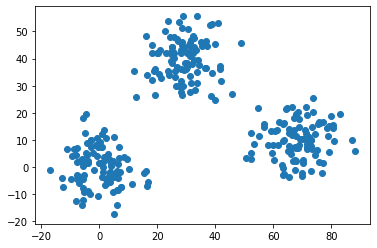

Положения центроидов для модельного случая (должны быть близки к [(0, 0), (70, 10), (30, 40)] с точностью до порядка): [(69, 10), (0, 0), (29, 40)]


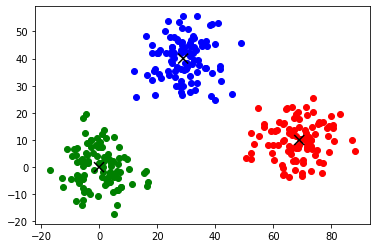

In [3]:
model_centers = [(0, 0), (70, 10), (30, 40)]
model_data = [(random.gauss(c[0], 7), random.gauss(c[1], 7)) for c in model_centers for _ in range(100)]

plt.scatter(*[list(map(lambda x: x[i], model_data)) for i in range(2)], marker='o')
plt.show()

model_clusts, model_centrs = kmeans(model_data, 3)
print(f'Положения центроидов для модельного случая (должны быть близки к {model_centers} с точностью до порядка): '
      f'{model_centrs}')

for i in range(len(model_clusts)):
    plt.scatter(*[list(map(lambda x: x[j], model_clusts[i])) for j in range(2)],
                marker='o',
                c=('r', 'g', 'b')[i])
plt.scatter(*[list(map(lambda x: x[j], model_centrs)) for j in range(2)],
            marker='x',
            c='black', s=[100] * len(model_clusts))
plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
print()
print('Загруза картинки из файла "image.png".')
image = Image.open('/content/drive/MyDrive/питон/Машинка/5 прак/Без названия.jfif')
image_pixels = image.load()
data = [image_pixels[x, y] for x, y in product(range(image.size[0]), range(image.size[1]))]

# количество цветов, которе остается на результирующей картинке (можно поварьировать,
# но от него сильно зависит время выполнения)
clusters_num = 4

print()
print('Запуск алгоритма k-средних (может занять время..)')
clusts, centrs = kmeans(data, clusters_num)


print('Сокращение количества цветов на картинке.')
for x, y in product(range(image.size[0]), range(image.size[1])):
    for i in range(len(clusts)):
        if image_pixels[x, y] in clusts[i]:
            image_pixels[x, y] = centrs[i]
            break
image.save('result.png')

print('Успех! Результат в файле "result.png" (обратите внимаение на размер результата в килобайтах).')


Загруза картинки из файла "image.png".

Запуск алгоритма k-средних (может занять время..)
Сокращение количества цветов на картинке.


KeyboardInterrupt: ignored

# Метод главных компонент

In [6]:
from PIL import Image
from matplotlib import pyplot as plt
from itertools import product
import random
import numpy as np

In [7]:
# В данной части лабораторной работы предлагается реализовать метод главных компонент для сокращения
# размерности даннных. В качестве данных предлагаются изображения с лицами людей.

# Для выполнения этой работы необходимо заполнить код в следующих фукнциях:
# 1. pca - реализует алгоритм метода главных компонент.
# 2. project_data - проецирует данные в пространство с базисом, заданным матрицей перехода.
# 3. recover_data - восстанавливает спроецированные данные.


def load_data(data_file_path):

    # Функция для загрузки данных.
    # Принимает на вход путь к файлу.
    # Возвращает матрицу данных.

    with open(data_file_path) as input_file:
        X = list()
        for line in input_file:
            row = list(map(float, line.split(',')))
            X.append(row)
        return np.array(X, float)


def pca(X, k):

    # Функция, реализующая алгоритм метода главных компонент. Принимает на вход матрицу данных X и
    # число главных компонент k.
    # Должна возвращать k главных компонент в виде матрицы (главные компоненты - столбцы) и долю сохраненной дисперсии.

    m, n = X.shape  # m - количество примеров в матрице X, n - количество признаков.

    U = np.zeros((X.shape[1], k))  # матрица главных компонент, нужно заполнить.
    saved_disp = 0  # доля сохранненой дисперсии после преобразования, необходимо рассчитать.

    # ВАШ КОД ЗДЕСЬ
    X = X - np.mean(X, axis=0)
    cov = 1 / m * X.T @ X
    

    w, v = np.linalg.eig(cov)
    indices = w.argsort()[-k:][::-1]
    
    U = v[:, indices]

    saved_disp = np.sum(w[indices]) / np.sum(w)
    # =============

    return U, saved_disp


def project_data(X, U):

    # Функция для проекции данных в пространство с базисом, заданным матрицей U.
    # Принимает матрицу данных X и матрицу U, задающую базис пространства.
    # Должна возвращать новую матрицу данных, где все точки спроецированны в заданное пространство.

    Xp = np.zeros((X.shape[0], U.shape[1]))  # результат, надо заполнить

    # ВАШ КОД ЗДЕСЬ
    Xp = X @ U
    # =============

    return Xp


def recover_data(Xp, U):

    # Функция для проекции данных из пространства с базисом, заданным матрицей U, в базис ijk.
    # Принимает матрицу данных Xp и матрицу U, задающую базис пространства.
    # Должна возвращать новую матрицу данных, где все точки спроецированны из заданного пространства,
    # в пространство с базисом ijk.

    X_rec = np.zeros((Xp.shape[0], U.shape[0]))  # результат, надо заполнить

    # ВАШ КОД ЗДЕСЬ
    X_rec = Xp @ U.T
    # =============

    return X_rec

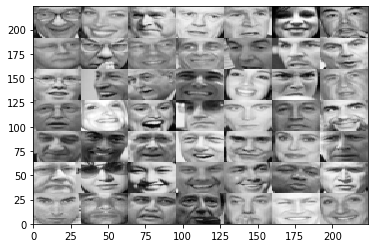

In [8]:
X = load_data('/content/drive/MyDrive/питон/Машинка/5 прак/faces.txt')

hm = np.zeros((32 * 7, 32 * 7))
for i in range(49):
    im_x = i % 7 * 32
    im_y = i // 7 * 32
    for j in range(X.shape[1]):
        px_x = im_x + j % 32
        px_y = im_y + j // 32
        hm[7 * 32 - 1 - px_x, px_y] = -X[i, j]
plt.pcolor(hm, cmap='Greys')
plt.show()

Доля сохраненной дисперсии (должна быть ~0.911 при K = 64): 0.8946808356207999


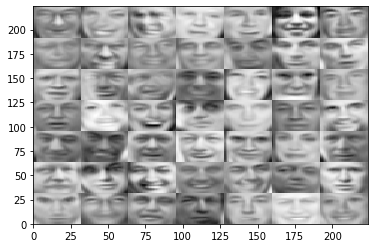

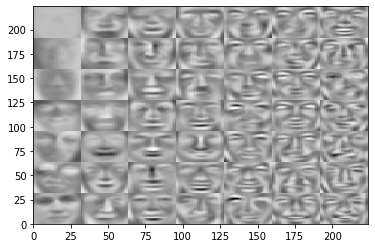

In [9]:
K = 64  # количество главных компонент, можно поварьировать

U, disp = pca(X, K)

print('Доля сохраненной дисперсии (должна быть ~0.911 при K = 64):', disp)

Xp = project_data(X, U)
X_rec = recover_data(Xp, U)

hm = np.zeros((32 * 7, 32 * 7))
for i in range(49):
    im_x = i % 7 * 32
    im_y = i // 7 * 32
    for j in range(X.shape[1]):
        px_x = im_x + j % 32
        px_y = im_y + j // 32
        hm[7 * 32 - 1 - px_x, px_y] = -X_rec[i, j]
plt.pcolor(hm, cmap='Greys')
plt.show()

hm = np.zeros((32 * 7, 32 * 7))
for i in range(49):
    im_x = i % 7 * 32
    im_y = i // 7 * 32
    for j in range(X.shape[1]):
        px_x = im_x + j % 32
        px_y = im_y + j // 32
        hm[7 * 32 - 1 - px_x, px_y] = U.transpose()[i, j]
plt.pcolor(hm, cmap='Greys')
plt.show()